In [3]:
from rdkit import Chem

In [4]:
from rdkit import Chem

def get_env_around_multiple_reactive_sites(atom_mapped_substrate_smarts: str, 
                                           radius: int, 
                                           reactive_atom_indices: list) -> str:
    """
    Extract the chemical environment around multiple reactive atoms at a specified bond radius.
    """
    substrate_mol = Chem.MolFromSmarts(atom_mapped_substrate_smarts)
    if substrate_mol is None:
        raise ValueError("Invalid SMARTS string provided.")
    
    # Initialize a set to collect all atom indices in the environment
    atom_indices = set()

    # Loop through each reactive atom and find its environment
    for atom_idx in reactive_atom_indices:
        reaction_environment = Chem.FindAtomEnvironmentOfRadiusN(
            mol=substrate_mol, radius=radius, rootedAtAtom=atom_idx
        )
        
        # Collect atom indices from the bonds in this environment
        for bond_idx in reaction_environment:
            bond = substrate_mol.GetBondWithIdx(bond_idx)
            atom_indices.add(bond.GetBeginAtomIdx())
            atom_indices.add(bond.GetEndAtomIdx())

    # Generate the SMARTS string for the combined environment
    env_smarts = Chem.MolFragmentToSmarts(
        substrate_mol, 
        atomsToUse=list(atom_indices)
    )
    
    return env_smarts

In [7]:
atom_mapped_substrate_smarts = '[N:1]#[C:2][C@H:3]([OH:4])[c:5]1[cH:6][cH:7][cH:8][cH:9][cH:10]1'
reactive_atom_indices = [2, 3, 4]  # Atoms undergoing the bond transformation
radius = 1

env_smarts = get_env_around_multiple_reactive_sites(atom_mapped_substrate_smarts, radius, reactive_atom_indices)
print(env_smarts)


[C:2][C@&H1:3]([O&H1:4])[c:5]([c&H1:6])[c&H1:10]


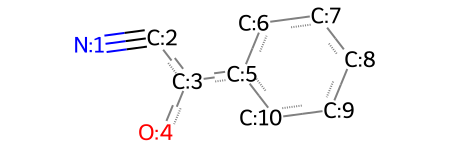

In [6]:
Chem.MolFromSmarts('[N:1]#[C:2][C@H:3]([OH:4])[c:5]1[cH:6][cH:7][cH:8][cH:9][cH:10]1')

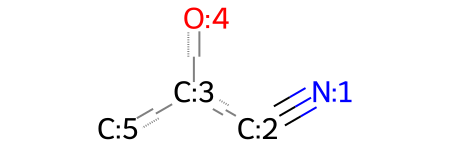

In [15]:
Chem.MolFromSmarts('[N:1]#[C:2][C@&H1:3]([O&H1:4])[c:5]')

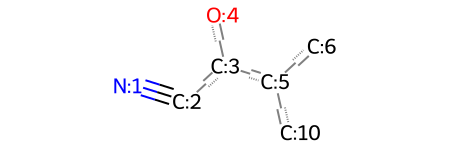

In [17]:
Chem.MolFromSmarts('[N:1]#[C:2][C@&H1:3]([O&H1:4])[c:5]([c&H1:6])[c&H1:10]')

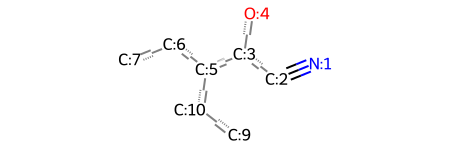

In [19]:
Chem.MolFromSmarts('[N:1]#[C:2][C@&H1:3]([O&H1:4])[c:5]([c&H1:6][c&H1:7])[c&H1:10][c&H1:9]')

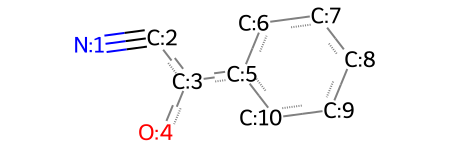

In [21]:
Chem.MolFromSmarts('[N:1]#[C:2][C@&H1:3]([O&H1:4])[c:5]1[c&H1:6][c&H1:7][c&H1:8][c&H1:9][c&H1:10]1')

In [ ]:
NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](O)[C@@H]3O)[C@@H](O)[C@H]2O)c1.O=C1CCNC(=O)N1>>NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](O)[C@@H]3O)[C@@H](O)[C@H]2O)C=CC1.O=c1cc[nH]c(=O)[nH]1.[H+]


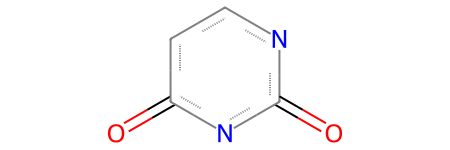

In [22]:
Chem.MolFromSmarts('O=C1CCNC(=O)N1')

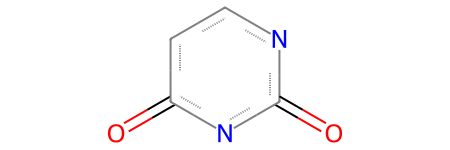

In [23]:
Chem.MolFromSmarts('O=c1cc[nH]c(=O)[nH]1')

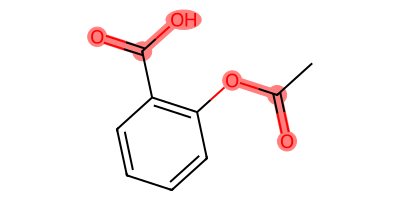

In [27]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
from copy import deepcopy


def increase_resolution(mol, substructure, size=(400, 200), kekulize=True):
    mol = deepcopy(mol)
    substructure = deepcopy(substructure)
    rdDepictor.Compute2DCoords(mol)
    if kekulize:
        Chem.Kekulize(mol) # Localize the benzene ring bonds
        
    drawer = rdMolDraw2D.MolDraw2DSVG(size[0], size[1])
    
    # highlightAtoms expects only one tuple, not tuple of tuples. So it needs to be merged into a single tuple
    matches = sum(mol.GetSubstructMatches(substructure), ())
    drawer.DrawMolecule(mol, highlightAtoms=matches)
    
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')


mol = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
substructure = Chem.MolFromSmarts('C(=O)O')
SVG(increase_resolution(mol, substructure, kekulize=True))

In [32]:
from rdkit import Chem

def get_env_around_multiple_reactive_sites(atom_mapped_substrate_smarts: str, 
                                           radius: int, 
                                           reactive_atom_indices: list) -> str:
    """
    Extract the chemical environment around multiple reactive atoms at a specified bond radius.
    """
    substrate_mol = Chem.MolFromSmarts(atom_mapped_substrate_smarts)
    if substrate_mol is None:
        raise ValueError("Invalid SMARTS string provided.")
    
    # Initialize a set to collect all atom indices in the environment
    atom_indices = set()

    # Loop through each reactive atom and find its environment
    for atom_idx in reactive_atom_indices:
        reaction_environment = Chem.FindAtomEnvironmentOfRadiusN(
            mol=substrate_mol, radius=radius, rootedAtAtom=atom_idx
        )
        reaction_environment = Chem.PathToSubmol(substrate_mol,
                                                 reaction_environment)
        
        # Collect atom indices from the bonds in this environment
        for bond_idx in reaction_environment:
            bond = substrate_mol.GetBondWithIdx(bond_idx)
            atom_indices.add(bond.GetBeginAtomIdx())
            atom_indices.add(bond.GetEndAtomIdx())

    # Generate the SMARTS string for the combined environment
    env_smarts = Chem.MolFragmentToSmarts(
        substrate_mol, 
        atomsToUse=list(atom_indices)
    )
    
    return env_smarts

In [33]:
atom_mapped_substrate_smarts = '[N:1]#[C:2][C@H:3]([OH:4])[c:5]1[cH:6][cH:7][cH:8][cH:9][cH:10]1'
reactive_atom_indices = [1, 2]  # Atoms undergoing the bond transformation
radius = 4

env_smarts = get_env_around_multiple_reactive_sites(atom_mapped_substrate_smarts, radius, reactive_atom_indices)
print(env_smarts)


TypeError: 'Mol' object is not iterable

In [38]:
env = Chem.FindAtomEnvironmentOfRadiusN(mol = Chem.MolFromSmarts('[CH3:1][CH2:2][OH:3]'), 
                                  radius = 2, 
                                  rootedAtAtom = 2)

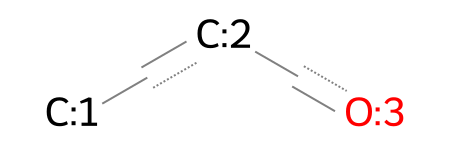

In [39]:
Chem.PathToSubmol(Chem.MolFromSmarts('[CH3:1][CH2:2][OH:3]'),
                  env)

In [23]:
substrate_mol = Chem.MolFromSmarts('[N:1]#[C:2][C@H:3]([OH:4])[c:5]1[cH:6][cH:7][cH:8][cH:9][cH:10]1')
reaction_environment = Chem.FindAtomEnvironmentOfRadiusN(substrate_mol,
                                                        radius = 1,
                                                        rootedAtAtom = 3)

In [24]:
for bond_idx in reaction_environment:
    bond = substrate_mol.GetBondWithIdx(bond_idx)
    print(bond.GetBeginAtomIdx())

2


In [46]:
from rdkit import Chem

In [47]:
mol = Chem.MolFromSmarts('[N:1]#[C:2][C@H:3]([OH:4])[c:5]1[cH:6][cH:7][cH:8][cH:9][cH:10]1')

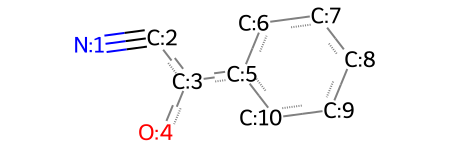

In [48]:
mol

In [50]:
env = Chem.FindAtomEnvironmentOfRadiusN(mol, radius = 1, rootedAtAtom = 5)

In [51]:
submol = Chem.PathToSubmol(mol, env)

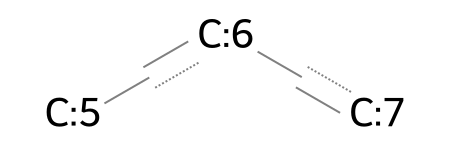

In [52]:
submol

Atom map numbers:
Atom index: 0, Atom map number: 1
Atom index: 1, Atom map number: 2
Atom index: 2, Atom map number: 3
Atom index: 3, Atom map number: 4
Atom index: 4, Atom map number: 5
Atom index: 5, Atom map number: 6
Atom index: 6, Atom map number: 7
Atom index: 7, Atom map number: 8
Atom index: 8, Atom map number: 9
Atom index: 9, Atom map number: 10
Sub-molecule:
Atom index: 0, Atom map number: 3
Atom index: 1, Atom map number: 5
Atom index: 2, Atom map number: 6
Atom index: 3, Atom map number: 10


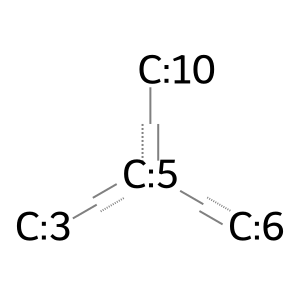

In [53]:
from rdkit import Chem

# Create a molecule from the SMARTS string
smarts = '[N:1]#[C:2][C@H:3]([OH:4])[c:5]1[cH:6][cH:7][cH:8][cH:9][cH:10]1'
mol = Chem.MolFromSmarts(smarts)

# Verify atom map numbers
print("Atom map numbers:")
for atom in mol.GetAtoms():
    print(f"Atom index: {atom.GetIdx()}, Atom map number: {atom.GetAtomMapNum()}")

# Find the atom index for atom map number 5
rooted_atom_map = 5
rooted_atom_index = None
for atom in mol.GetAtoms():
    if atom.GetAtomMapNum() == rooted_atom_map:
        rooted_atom_index = atom.GetIdx()
        break

if rooted_atom_index is None:
    raise ValueError(f"Atom with map number {rooted_atom_map} not found!")

# Use FindAtomEnvironmentOfRadiusN with the rooted atom index
radius = 1
env = Chem.FindAtomEnvironmentOfRadiusN(mol, radius, rootedAtAtom=rooted_atom_index)

# Create a sub-molecule from the environment
submol = Chem.PathToSubmol(mol, env)

# Display the sub-molecule
print("Sub-molecule:")
for atom in submol.GetAtoms():
    print(f"Atom index: {atom.GetIdx()}, Atom map number: {atom.GetAtomMapNum()}")

# Optionally visualize the sub-molecule
from rdkit.Chem import Draw
Draw.MolToImage(submol)


#### for multiple reactive sites:

Combined sub-molecule:
Atom index: 0, Atom map number: 1
Atom index: 1, Atom map number: 2
Atom index: 2, Atom map number: 3
Atom index: 3, Atom map number: 4
Atom index: 4, Atom map number: 5
Atom index: 5, Atom map number: 6
Atom index: 6, Atom map number: 7
Atom index: 7, Atom map number: 8
Atom index: 8, Atom map number: 9


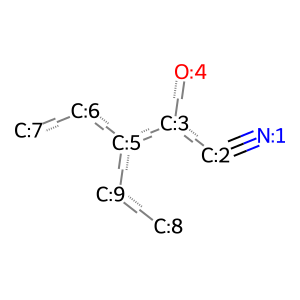

In [57]:
from rdkit import Chem
from rdkit.Chem import rdchem
from rdkit.Chem import Draw

def find_combined_submol(smarts, reactive_sites, radius=1):
    """
    Find and combine sub-molecules for multiple reactive sites.

    Parameters:
    - smarts: str, the SMARTS string for the molecule
    - reactive_sites: list of int, atom map numbers for the reactive sites
    - radius: int, radius around each atom in the reactive sites to include in the sub-molecule

    Returns:
    - combined_submol: RDKit Mol object, the combined sub-molecule
    """
    # Create a molecule from the SMARTS string
    mol = Chem.MolFromSmarts(smarts)
    if mol is None:
        raise ValueError("Invalid SMARTS string!")

    # Store the union of all atom environments
    combined_env = set()

    # Process each reactive site
    for map_num in reactive_sites:
        # Find the atom index corresponding to the atom map number
        rooted_atom_index = None
        for atom in mol.GetAtoms():
            if atom.GetAtomMapNum() == map_num:
                rooted_atom_index = atom.GetIdx()
                break
        if rooted_atom_index is None:
            raise ValueError(f"Atom with map number {map_num} not found!")

        # Find the atom environment for the current atom
        env = Chem.FindAtomEnvironmentOfRadiusN(mol, radius, rootedAtAtom=rooted_atom_index)
        combined_env.update(env)  # Combine the environments

    # Convert the combined environment to a sub-molecule
    combined_submol = Chem.PathToSubmol(mol, list(combined_env))

    # Propagate atom map numbers to the sub-molecule
    for atom in combined_submol.GetAtoms():
        original_atom = mol.GetAtomWithIdx(atom.GetIdx())
        atom.SetAtomMapNum(original_atom.GetAtomMapNum())

    return combined_submol

# Example usage
smarts = '[N:1]#[C:2][C@H:3]([OH:4])[c:5]1[cH:6][cH:7][cH:8][cH:9][cH:10]1'
reactive_sites = [2, 3]  # Atom map numbers for the reactive sites
radius = 3

# Find and combine the sub-molecule
combined_submol = find_combined_submol(smarts, reactive_sites, radius)

# Display the combined sub-molecule
print("Combined sub-molecule:")
for atom in combined_submol.GetAtoms():
    print(f"Atom index: {atom.GetIdx()}, Atom map number: {atom.GetAtomMapNum()}")

# Visualize the combined sub-molecule
Draw.MolToImage(combined_submol)


In [59]:
Chem.MolToSmarts(combined_submol)

'[N:1]#[C:2][C@&H1:3]([O&H1:4])[c:5]([c&H1:6][c&H1:7])[c&H1:9][c&H1:8]'